## Qual a vazão de saída do reservatório a cada momento? 

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
data_path = Path("data/preprocessed_data/water_consumption_cleaned_0.parquet")
df = pd.read_parquet(data_path)
df.head()

,timestamp,flow_in_(l/s),reservoir_level_(%),pressure_(mca),gmb_1_is_on,gmb_2_is_on
0,2023-03-17 11:27:06,68.59,29.86,38.20,0,1
1,2023-03-17 12:28:56,66.05,35.86,38.20,0,1
2,2023-03-17 12:31:26,65.64,36.16,38.06,0,1
3,2023-03-17 12:33:56,65.64,36.50,38.03,0,1
4,2023-03-17 12:36:26,65.64,36.80,38.17,0,1


In [3]:
# Constants
RESERVOIR_TOTAL_CAPACITY = 1_000_000  # Total capacity of the reservoir in liters.

# Calculate reservoir level in liters, time difference, and volume difference
df = df.assign(
    reservoir_level_liters=lambda x: (x["reservoir_level_percentage"] / 100) * RESERVOIR_TOTAL_CAPACITY,
    time_passed_seconds=lambda x: x["timestamp"].diff().dt.total_seconds(),
    liters_entered=lambda x: x["reservoir_level_liters"].diff()
)

# Calculate flow out
df["flow_out_l_s"] = (-df["liters_entered"] / df["time_passed_seconds"]) + df["flow_in_l_s"]

# Display the first few rows to verify the calculations
df.head()

,timestamp,flow_in_(l/s),reservoir_level_(%),pressure_(mca),gmb_1_is_on,gmb_2_is_on,reservoir_level_liters,time_passed_seconds,liters_entered,flow_out_(l/s)
0,2023-03-17 11:27:06,68.59,29.86,38.20,0,1,298600.0,NaN,NaN,NaN
1,2023-03-17 12:28:56,66.05,35.86,38.20,0,1,358600.0,3710.0,60000.0,49.877493
2,2023-03-17 12:31:26,65.64,36.16,38.06,0,1,361600.0,150.0,3000.0,45.640000
3,2023-03-17 12:33:56,65.64,36.50,38.03,0,1,365000.0,150.0,3400.0,42.973333
4,2023-03-17 12:36:26,65.64,36.80,38.17,0,1,368000.0,150.0,3000.0,45.640000


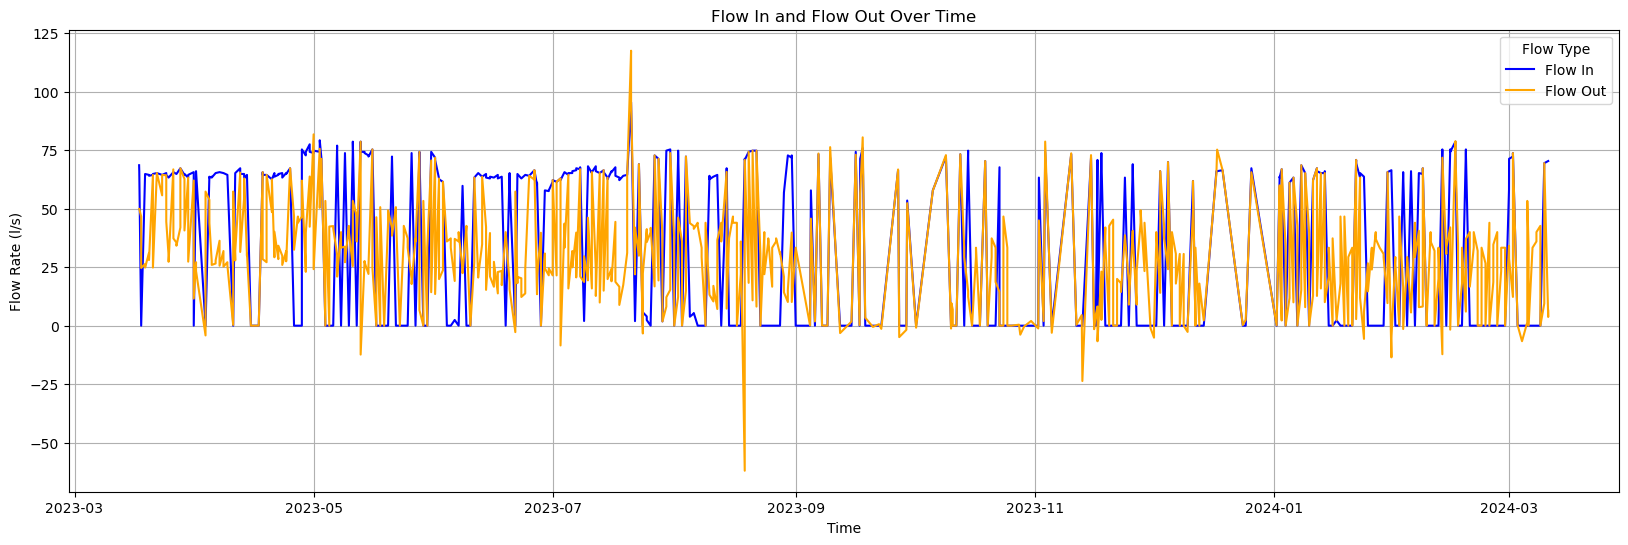

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
df_filtered = df.copy()
df_filtered = df_filtered.groupby(df_filtered['timestamp'].dt.date).head(2).reset_index(drop=True)
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_filtered, x='timestamp', y='flow_in_l_s_', label='Flow In', color='blue')
sns.lineplot(data=df_filtered, x='timestamp', y='flow_out_l_s', label='Flow Out', color='orange')
plt.title('Flow In and Flow Out Over Time')
plt.xlabel('Time')
plt.ylabel('Flow Rate (l/s)')
plt.legend(title='Flow Type')
plt.grid(True)
plt.show()